In [97]:
import sys
!{sys.executable} -m pip install nose
!{sys.executable} -m pip install otter-grader
!{sys.executable} -m pip install seaborn

# Exercise sheet 7
**Hello everyone!**

**Points: 15 (+2 bonus)**

Topics of this exercise sheet are:
* Probabilities
* Law of large numbers
* Central limit theorem

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/unibas.ch/spring2023/63982), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *07-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 18.04.2023 <br>
**Submission date**: 25.04.2023 before 16:00 <br>


### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true
from scipy.stats import bernoulli

In [99]:
import otter
grader = otter.Notebook()

## 1) Central limit theorem (10 points)
The central limit theorem is a key results of practical importance for data scientists. In this first part, we will work around this result to better understand it.


Let's start with the simplest statistical example, the toss of a coin. We simulate the toss using the generation of a Bernoulli random variable in the library scipy. We display the empirical distribution (histogram) of the generated samples.

(array([40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

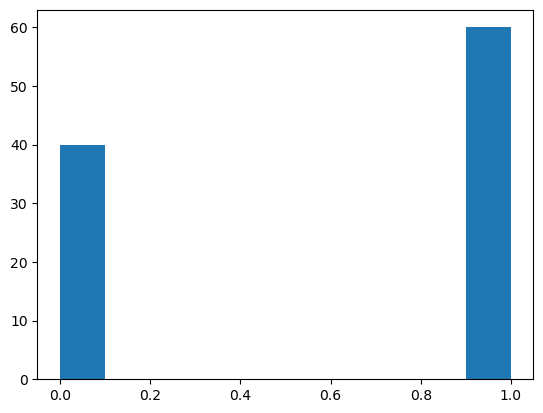

In [100]:
toss_coin = bernoulli.rvs(p=0.5, size=100) 
plt.hist(toss_coin)   

### 1a (2 points)
Reproduce this experiment $N=1000$ times. Store the result in an array *toss_coin_all* of size (1000,100).

In [101]:
N=1000
toss_coin_all = np.array([bernoulli.rvs(p=0.5, size=100) for _ in range(N)])

In [102]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (1 point)
For each of the $N=1000$ experiment, compute the sum of the obtained values. Store the result in an array named *toss_sum*.

In [103]:
toss_sum = np.array([np.sum(i) for i in toss_coin_all])

In [104]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (2 points) 
Then, display the histogram of this result. Does it look like an empirical Gaussian distribution?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1c        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

(array([0.00366667, 0.0022    , 0.0088    , 0.01686667, 0.0198    ,
        0.05573333, 0.03373333, 0.05353333, 0.08653333, 0.06306667,
        0.06746667, 0.09606667, 0.066     , 0.06526667, 0.022     ,
        0.0264    , 0.0264    , 0.00586667, 0.0066    , 0.00513333,
        0.00073333, 0.00146667]),
 array([36.        , 37.36363636, 38.72727273, 40.09090909, 41.45454545,
        42.81818182, 44.18181818, 45.54545455, 46.90909091, 48.27272727,
        49.63636364, 51.        , 52.36363636, 53.72727273, 55.09090909,
        56.45454545, 57.81818182, 59.18181818, 60.54545455, 61.90909091,
        63.27272727, 64.63636364, 66.        ]),
 [<matplotlib.patches.Polygon at 0x7faa8144c610>])

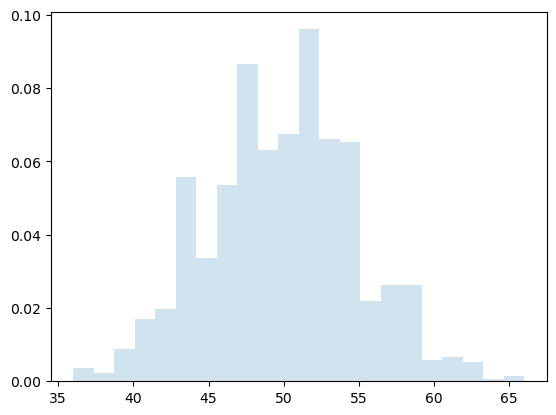

In [105]:
fig, ax = plt.subplots(1, 1)
ax.hist(toss_sum, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

<!-- END QUESTION -->



### 1d (2 point)
Now we want to fit a Gaussian distribution to the samples in the previsous part. In particualr, we want to fit a Gaussian distribution to the following random variable:

$$
 S_N = \sum_{i = 1}^N X_i
$$
As mentioned in the lecture, the probablity distribution of $S_N$ tends to a Gaussian distribution as N goes to infinity:
$$
 S_N \to \mathcal{N}(N \mu, N \sigma^2)
$$
Now, display the probability density function (pdf) of the Gaussian random variable where the number of samples $N = 100$ and the mean and standard deviation of the Bernouli distribution $\mu = 0.5$, $\sigma = 0.5$. Please use the variable "x" defined below as the x-axis of your plot. Please use the scipy library and the example in this webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1d        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

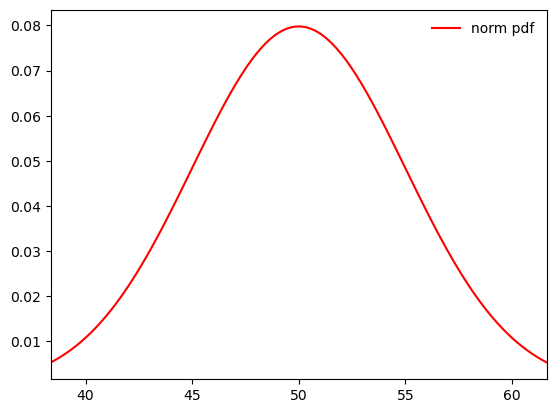

In [106]:
from scipy.stats import norm

N = 100
mu = 0.5
sigma = 0.5
x = np.linspace(norm.ppf(0.01, N * mu, np.sqrt(N) * sigma),
                norm.ppf(0.99, N * mu, np.sqrt(N) * sigma),
                100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x, N * mu, np.sqrt(N) * sigma), 'r-', label='norm pdf')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)

<!-- END QUESTION -->



### 1e (3 points)
Display the empirical distribution of the sum of tossed coins and the pdf of the Gaussian random variable on the same plot. Please use the variable "x" defined below as the x-axis of your plot.

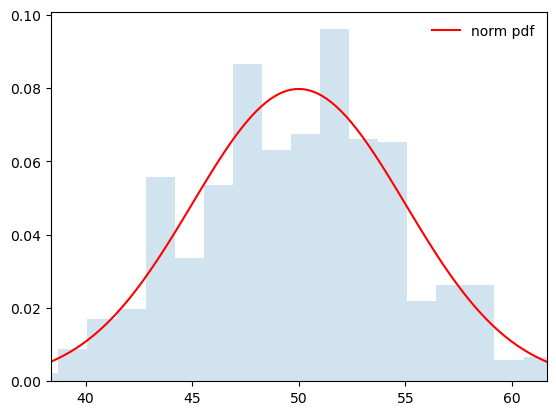

In [107]:
x = np.linspace(norm.ppf(0.01, N * mu, np.sqrt(N) * sigma),
                norm.ppf(0.99, N * mu, np.sqrt(N) * sigma),
                100)

fig, ax = plt.subplots(1, 1)
ax.hist(toss_sum, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.plot(x, norm.pdf(x, N * mu, np.sqrt(N) * sigma), 'r-', label='norm pdf')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)

<!-- END QUESTION -->



What happen if $N$ is now larger than 1000? Try with different N! (no need to write a nice answer here, just change the value one or two times to see what is happening).
***And don't forget to set it back to N=1000.***

The histogram takes a shape more like a Gaussian as the parameter N becomes larger, thus precisely the central limit theorem.

## 2) Law of large numbers (LLN) (5 points)
The LLN is also a key tool used by all data scientists. This principle is the basis of what is called Monte Carlo simulation. <br>
In this paragraph, we will use this result to estimate the mean of a Poisson random variable.

### 2a (1 point)
Using the scipy library, display the probability mass function of the Poisson distribution for $\lambda=5$. Please use the variable "x" defined below as the x-axis of your plot. Please use the scipy library and the example in this webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2a        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [108]:
from scipy.stats import poisson
lam = 5
x = np.arange(poisson.ppf(0.0001, lam),
              poisson.ppf(0.9999, lam))

...

Ellipsis

<!-- END QUESTION -->



### 2b (2 points)
Generate $N=10000$ independent samples from the given poisson distribution ($\lambda = 5$) and store them in the variable "data". Calculate the empirical mean when using the first $i = 11,12,13,...,10000$ samples from the "data" variable. You can use "np.cumsum" function in numpy which calculates the cumulative mean. Please plot the the calculated empirical means and compare them with the true mean of the given poisson distribution (expected value) $\lambda = 5$.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2b        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [109]:
N = 10000
...

<!-- END QUESTION -->



### 2c (2 points)
It is rather hard to see if the empirical mean is tending to the true one. Plot the absolute error between the empirical and the true mean ($y$-axis) against the number of samples used ($x$-axis). Use a log scale (for the error).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2c        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [110]:
...

Ellipsis

<!-- END QUESTION -->



## 3) (Bonus) Monte Carlo simulation (2 point)

Did you notice that the previous plots change every time you run again the cells?
This is because the average mean that we compute is still a random estimation. For some realization it may be close to the true mean, for other it may be far. <br>
To get a clear conclusion, we might want to know what is happening in average, what is the average behaviour of this estimator. <br>
<br>
To do so, we will do a Monte Carlo simulation, i.e. reproduce the previous experiment several times and compute the average error.<br>


### 3a (2 point) (Optional):
Compute and store the absolute error between the average means (using $1,2,3,... 10000$ samples) and the true mean. Reproduce this experiment $M=100$ times, and display the average error. <br>
Hint: for a better display, you can display ony error for $100, 101, ... 10000$ samples.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 3a        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [111]:
M = 100
err_abs = np.zeros((M,N))
err_abs = ...
...
start = 100
plt.plot(err_abs.mean(0)[start:])

AttributeError: 'ellipsis' object has no attribute 'mean'

<!-- END QUESTION -->



Notice that the plot is not changing much (as in the begining of the LLN paragraph) every time you run the code. This is (maybe) your first Monte Carlo simulation!

We saw in this notebook that by reproducing a large number of time the same experiment, we are able to estimate information about the observation, such as the distribution of the mean of some quantities. However, in many practical situations, it is impossible to have acces to a very large amount of data. In the following of the course you will see that we can construct confidence interval from the observations. This tool will be key to known either or not we can trust the result obtained with a limited amount of data.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()